In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
xls = pd.ExcelFile('healthstatelifeexpectancy_dataset.xlsx')

In [ ]:
df = pd.read_excel(xls, sheet_name='Table 1')

In [ ]:
df

,"Table 1: Life expectancy and healthy life expectancy by sex, age and deprivation decile, England, 2011 to 2013 to 2018 to 2020 [Note 1]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,This worksheet contains one table. The notes c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Period,IMD Decile,Sex_code,Sex,Ageband,Age group,Life expectancy (LE),LE lower confidence interval,LE upper confidence interval,Healthy life expectancy (HLE),HLE lower confidence interval,HLE upper confidence interval,"Proportion of life spent in ""good health"" (%)"
2,2011-2013,1,1,Male,1,<1,73.9,73.8,74,52,51.5,52.5,70.4
3,2011-2013,1,1,Male,2,01-04,73.4,73.3,73.5,51.4,50.9,51.9,70.1
4,2011-2013,1,1,Male,3,05-09,69.5,69.4,69.6,47.8,47.2,48.3,68.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2018-2020,10,2,Female,16,70-74,18.8,18.8,18.9,10.7,10.3,11.2,57.1
3198,2018-2020,10,2,Female,17,75-79,14.7,14.6,14.7,7.6,7.2,8,51.8
3199,2018-2020,10,2,Female,18,80-84,10.9,10.8,10.9,5,4.7,5.4,46.4
3200,2018-2020,10,2,Female,19,85-89,7.7,7.6,7.7,3.2,2.9,3.5,41.6


 Clean the data

In [ ]:
df.columns = ['Period', 'IMD_Decile', 'Sex_code', 'Sex', 'Ageband', 'Age_group',
              'Life_expectancy', 'LE_lower_CI', 'LE_upper_CI', 'Healthy_life_expectancy',
              'HLE_lower_CI', 'HLE_upper_CI', 'Proportion_good_health']


Drop rows with missing values in key columns

In [ ]:
df = df.dropna(subset=['IMD_Decile', 'Life_expectancy', 'Healthy_life_expectancy'])

In [ ]:
df.loc[:, 'IMD_Decile'] = pd.to_numeric(df['IMD_Decile'], errors='coerce')
df.loc[:, 'Life_expectancy'] = pd.to_numeric(df['Life_expectancy'], errors='coerce')
df.loc[:, 'Healthy_life_expectancy'] = pd.to_numeric(df['Healthy_life_expectancy'], errors='coerce')


Analysis 1 - Life Expectancy by Deprivation Decile
# Group data by deprivation decile and calculate average life expectancy

In [ ]:
life_exp_by_decile = df.groupby('IMD_Decile')['Life_expectancy'].mean()

Life Expectancy by Deprivation Decile

<ipython-input-11-67b2966f76d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_exp_by_decile.index, y=life_exp_by_decile.values, palette="Blues_d")


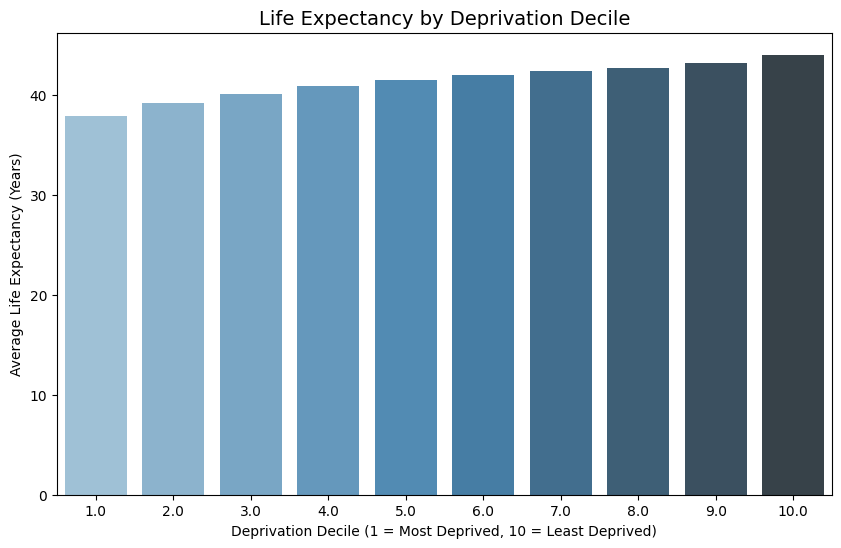

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=life_exp_by_decile.index, y=life_exp_by_decile.values, palette="Blues_d")
plt.title('Life Expectancy by Deprivation Decile', fontsize=14)
plt.xlabel('Deprivation Decile (1 = Most Deprived, 10 = Least Deprived)')
plt.ylabel('Average Life Expectancy (Years)')
plt.show()

Finding:
Life expectancy typically decreases as deprivation increases. This suggests that more deprived groups tend to have lower life expectancies.

Indicates a clear disparity in healthcare access and outcomes between more and less deprived areas.

Analysis 2 - Healthy Life Expectancy by Deprivation Decile

In [ ]:
hle_by_decile = df.groupby('IMD_Decile')['Healthy_life_expectancy'].mean()

Plot Healthy Life Expectancy by Deprivation Decile

<ipython-input-13-e6ac4e5f1166>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hle_by_decile.index, y=hle_by_decile.values, palette="Greens_d")


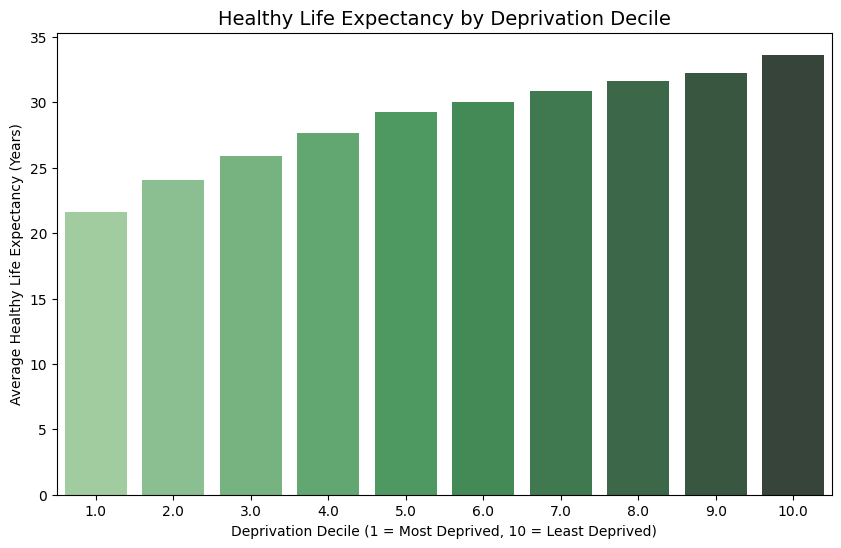

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hle_by_decile.index, y=hle_by_decile.values, palette="Greens_d")
plt.title('Healthy Life Expectancy by Deprivation Decile', fontsize=14)
plt.xlabel('Deprivation Decile (1 = Most Deprived, 10 = Least Deprived)')
plt.ylabel('Average Healthy Life Expectancy (Years)')
plt.show()

Finding:
Healthy life expectancy also varies across deprivation deciles, with more deprived groups often having lower healthy life expectancy.

People in more deprived areas not only live shorter lives but also experience a lower quality of life, highlighting the need for targeted health interventions.

Step 6: Analysis 3 - Gender Differences in Life Expectancy
# Group data by sex and IMD decile to analyze gender differences

In [ ]:
gender_life_exp = df.groupby(['IMD_Decile', 'Sex'])['Life_expectancy'].mean().unstack()

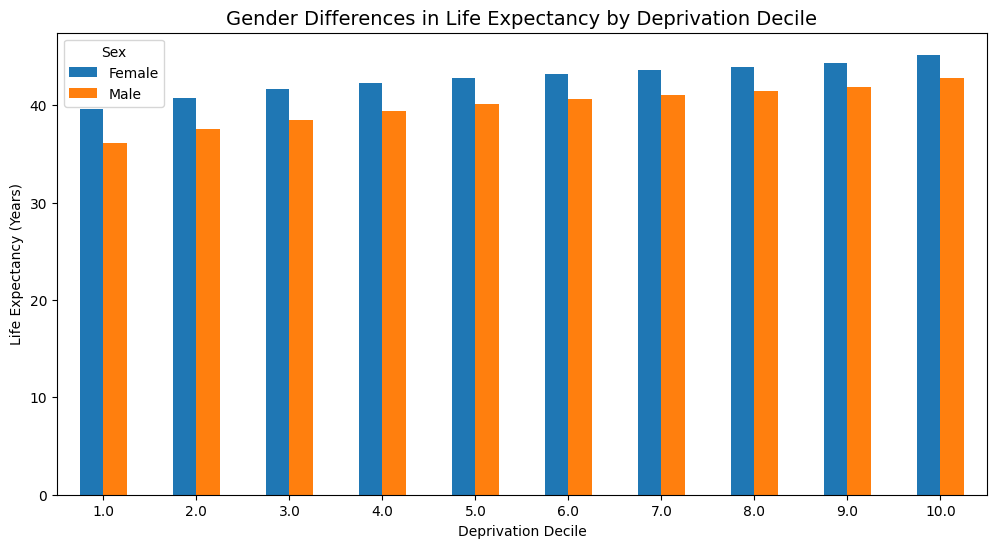

In [ ]:
gender_life_exp.plot(kind='bar', figsize=(12, 6))
plt.title('Gender Differences in Life Expectancy by Deprivation Decile', fontsize=14)
plt.xlabel('Deprivation Decile')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title="Sex")
plt.xticks(rotation=0)
plt.show()

Finding: Differences in life expectancy between genders within the same deprivation decile may be observed.
Implication: Points to potential gender-based disparities in health outcomes that could require gender-specific health policies or interventions.

Analysis 4 - Trends Over Time (2011 to 2020)
# Group data by period and deprivation decile to analyze trends

In [ ]:
trend_life_exp = df.groupby(['Period', 'IMD_Decile'])['Life_expectancy'].mean().unstack()


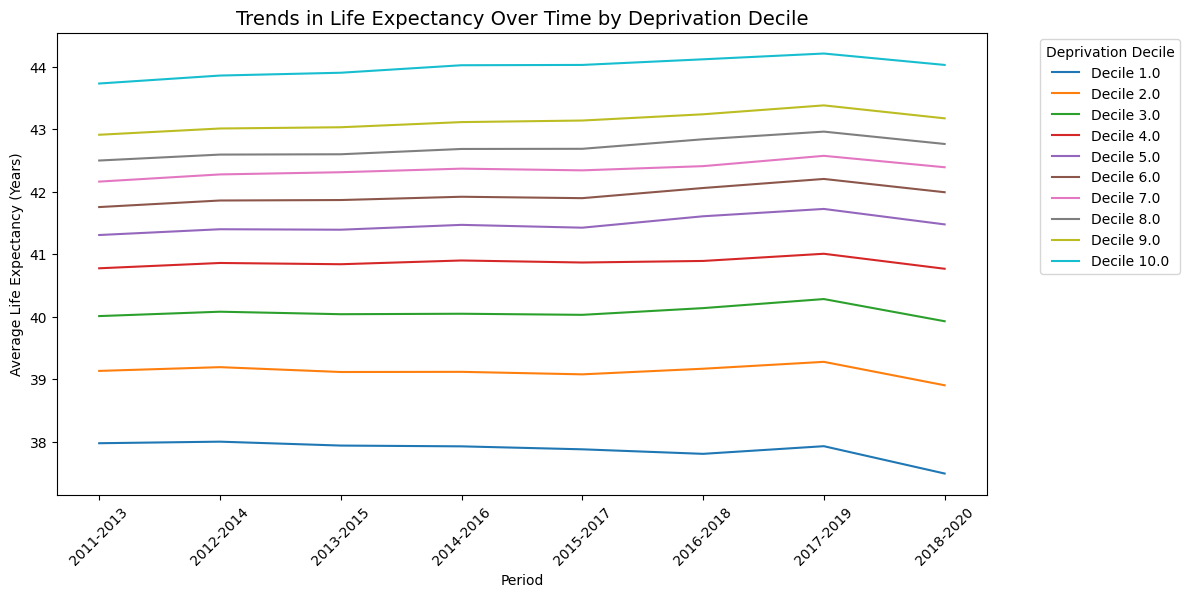

In [ ]:
plt.figure(figsize=(12, 6))
for decile in trend_life_exp.columns:
    plt.plot(trend_life_exp.index, trend_life_exp[decile], label=f'Decile {decile}')
plt.title('Trends in Life Expectancy Over Time by Deprivation Decile', fontsize=14)
plt.xlabel('Period')
plt.ylabel('Average Life Expectancy (Years)')
plt.legend(title="Deprivation Decile", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Finding: Changes in life expectancy over time for different deprivation deciles might reveal whether inequalities are widening or narrowing.
Implication: Provides insight into the effectiveness of past health policies and suggests whether further action is needed.

Analysis 5 - Correlation between Deprivation and Life Expectancy

Compute correlation between IMD Decile and Life Expectancy

In [ ]:
corr_life_exp = df[['IMD_Decile', 'Life_expectancy']].corr().iloc[0, 1]

print(f"Correlation between Deprivation Decile and Life Expectancy: {corr_life_exp:.2f}")

Correlation between Deprivation Decile and Life Expectancy: 0.07


In [ ]:
corr_hle = df[['IMD_Decile', 'Healthy_life_expectancy']].corr().iloc[0, 1]

print(f"Correlation between Deprivation Decile and Healthy Life Expectancy: {corr_hle:.2f}")

Correlation between Deprivation Decile and Healthy Life Expectancy: 0.17


Finding: Correlation coefficients between deprivation decile and life expectancy indicate the strength and direction of the relationship.
Implication: Strong negative correlation confirms that higher deprivation is associated with lower life expectancy and lower healthy life expectancy.